In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


In [2]:
data_1 = pd.read_csv("../input/tabular-playground-series-aug-2021/train.csv")
data_2 = pd.read_csv("../input/tabular-playground-series-aug-2021/test.csv")

In [3]:
print(data_1.info(),data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Columns: 101 entries, id to f99
dtypes: float64(95), int64(6)
memory usage: 115.6 MB
None None


In [4]:
id_1 = data_1.pop('id')
id_2 = data_2.pop('id')

In [5]:
train_x, val_x, train_y, val_y = train_test_split(data_1.drop('loss', axis =1), data_1.loss, test_size = 0.3, random_state = 1)

In [6]:
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(train_x))
v_x = pd.DataFrame(scale.fit_transform(val_x))
d = pd.DataFrame(scale.fit_transform(data_2))
#x.hist(figsize = (40,30))


In [7]:
#model_1 = RandomForestRegressor(n_estimators = 5, random_state = 1)
#model_1.fit(x, train_y)
#pred = model_1.predict(v_x)
#mae = mean_squared_error(pred, val_y)
#np.sqrt(mae)

In [8]:
#model_2 = XGBRegressor(n_estimators = 100, random_state = 1)
#model_2.fit(x, train_y)
#y = model_2.predict(v_x)
#mae = mean_squared_error(y, val_y)
#

In [9]:
model_3 = keras.Sequential([layers.BatchNormalization(),
    layers.InputLayer([train_x.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'linear'),
])

In [10]:
model_3.compile( loss = 'mse', 
             optimizer = keras.optimizers.Adam())
call = callbacks.EarlyStopping(patience = 10, min_delta = 0.001, restore_best_weights = True)

In [11]:
h = model_3.fit(x, train_y, validation_split = 0.3, epochs = 100, batch_size = 128, callbacks = [call])

Epoch 1/100
958/958 [==============================] - 14s 10ms/step - loss: 79.2853 - val_loss: 62.8031
Epoch 2/100
958/958 [==============================] - 9s 9ms/step - loss: 64.3846 - val_loss: 62.6180
Epoch 3/100
958/958 [==============================] - 9s 10ms/step - loss: 63.4375 - val_loss: 62.8077
Epoch 4/100
958/958 [==============================] - 10s 10ms/step - loss: 62.7153 - val_loss: 62.7023
Epoch 5/100
958/958 [==============================] - 9s 9ms/step - loss: 62.6066 - val_loss: 62.3677
Epoch 6/100
958/958 [==============================] - 9s 10ms/step - loss: 63.0509 - val_loss: 62.3282
Epoch 7/100
958/958 [==============================] - 9s 10ms/step - loss: 61.9648 - val_loss: 62.2920
Epoch 8/100
958/958 [==============================] - 10s 10ms/step - loss: 61.8929 - val_loss: 62.3875
Epoch 9/100
958/958 [==============================] - 9s 10ms/step - loss: 62.4963 - val_loss: 62.1947
Epoch 10/100
958/958 [==============================] - 10s 10m

7.783425635934794 7.883848033444907


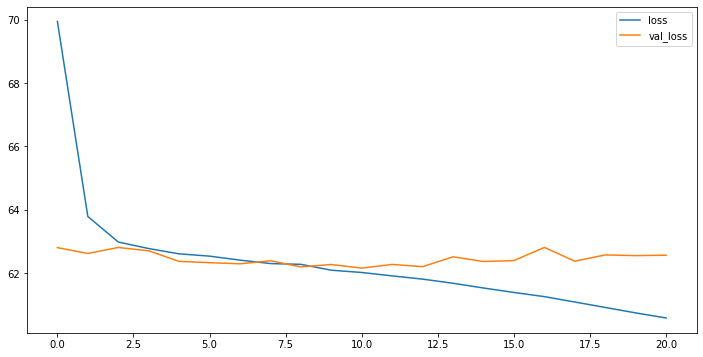

In [12]:
out = pd.DataFrame(h.history)
out.plot(kind = 'line', figsize = (12,6))
print(np.sqrt(out.loss.min()), np.sqrt(out.val_loss.min()))

In [13]:
valid = model_3.predict(v_x)
error = mean_squared_error(valid, val_y)
print(np.sqrt(error))
print(valid)

7.899515820795636
[[6.1365447]
 [5.9811835]
 [6.420522 ]
 ...
 [8.958486 ]
 [5.394589 ]
 [8.169415 ]]


In [14]:
ans = model_3.predict(d)
output = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")
output['loss'] = ans
output.to_csv('Submission_9', index = False)

In [15]:
output.loss.head()

0    6.508667
1    6.093718
2    7.166729
3    6.590701
4    6.709195
Name: loss, dtype: float32